# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
TODO

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [3]:
import bs4

### Cleaning and EDA

In [4]:
#How does political spending on snapchat vary across the world? Is there a tendency for parties of a certain political bent to spend more on snapchat?
#Which country costs the most per ad view?
#What types of ads/where are genders seperated?
#In the US, how does spending vary across election vs non-election years? (I would expect more spending in general and particularly for candidates in election years)
# Are ads in certain languages more expensive than others?

In [5]:
#read the files into dataframes
df_18 = pd.read_csv("PoliticalAds_18.csv")
df_19 = pd.read_csv("PoliticalAds_19.csv")
#zips = df_19["Targeting Geo - Postal Code"].dropna()
#adding a year column to both 18 and 19 dataframe that contains the year for every political ad
df_18 = df_18.assign(**{"Year": 18})
df_19 = df_19.assign(**{"Year": 19})
#concated the two years of information into one dataframe
catted_df = pd.concat([df_18, df_19])
#grabbed the countries from the mailing address and made a new column with this data
catted_df = catted_df.assign(**{"Country": catted_df['BillingAddress'].apply(lambda x: x[-2:])})
#converted the StartDate and EndDate to datetime objects in UTC time to be later used in our analysis
catted_df = catted_df.assign(**{"StartDate": pd.to_datetime(catted_df['StartDate'], infer_datetime_format = True)})
catted_df = catted_df.assign(**{"EndDate": pd.to_datetime(catted_df['EndDate'], infer_datetime_format = True)})
#found the dollar per view of all the ads
catted_df = catted_df.assign(**{"DollarPerView": catted_df['Spend'] / catted_df['Impressions']})
catted_df["Country"].unique()

#T
#bs4.BeautifulSoup(requests.get(df["CreativeUrl"][1]).text)#.prettify()

array(['US', 'GB', 'DK', 'CH', 'CA', 'NL', 'AU', 'FR', 'SE', 'IE', 'NO',
       'BE', 'ZA', 'KW', 'FI', 'AE', 'AT', 'IN', 'AR', 'DE', 'LT', 'TR'],
      dtype=object)

### Assessment of Missingness

In [6]:
props = {}
for col in catted_df.columns:
    tot = len(catted_df[col])
    non_null = len(catted_df[col].dropna())
    props[col] = (non_null / tot)
props

{'ADID': 1.0,
 'CreativeUrl': 1.0,
 'Spend': 1.0,
 'Impressions': 1.0,
 'StartDate': 1.0,
 'EndDate': 0.8013926733272783,
 'OrganizationName': 1.0,
 'BillingAddress': 1.0,
 'CandidateBallotInformation': 0.0681198910081744,
 'PayingAdvertiserName': 1.0,
 'Gender': 0.09748713290947623,
 'AgeBracket': 0.917045110505601,
 'CountryCode': 1.0,
 'RegionID': 0.3066908870723585,
 'ElectoralDistrictID': 0.019679079624583713,
 'LatLongRad': 0.0,
 'MetroID': 0.05449591280653951,
 'Interests': 0.23796548592188918,
 'OsType': 0.006357856494096276,
 'Segments': 0.66273085074175,
 'LocationType': 0.005449591280653951,
 'Language': 0.27671813502876175,
 'AdvancedDemographics': 0.029064486830154404,
 'Targeting Connection Type': 0.0,
 'Targeting Carrier (ISP)': 0.0,
 'Targeting Geo - Postal Code': 0.12079927338782924,
 'CreativeProperties': 0.8041174689676052,
 'Year': 1.0,
 'Country': 1.0,
 'DollarPerView': 1.0}

We want to see if Segments is MAR dependent on Spend

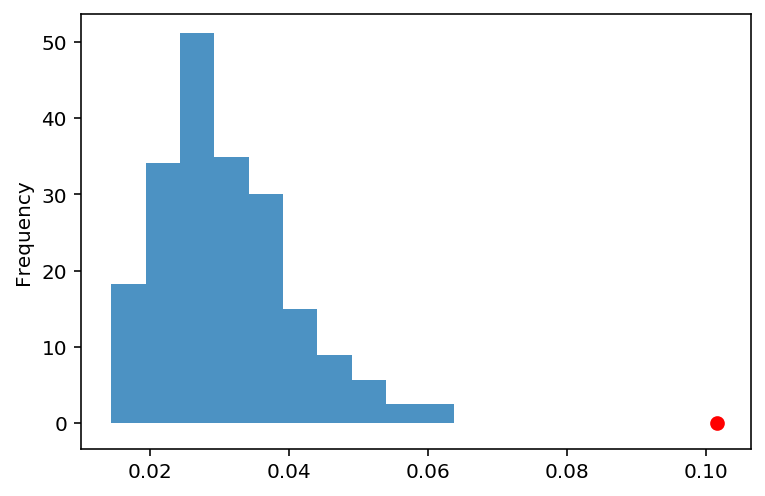

In [45]:
# This makes a column with booleans corresponding to the missingess of Segments, True if nan. I also select only 
#columns that will be used in the test, reducing the compuational load. This will be done for all subsequent tests
mdf = catted_df.assign(**{"SegMissing": catted_df["Segments"].isnull()})[["Spend", "SegMissing"]]
#mdf.groupby("SegMissing").Spend.plot(kind = "kde", title = "Distribution of Spend by missingness of segs");
#Calculate the observed ks
obsks, _ = ks_2samp(
    mdf.loc[mdf['SegMissing'], 'Spend'],
    mdf.loc[~mdf['SegMissing'], 'Spend']
)
n_repetitions = 500
kslist = []
for _ in range(n_repetitions):
    
    # shuffle the Spend
    shuffled_spend = (
        mdf['Spend']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # Throw it into a df
    shuffled = (
        mdf
        .assign(**{'ShuffledSpend': shuffled_spend})
    )
    #compute test stat
    ks, _ = ks_2samp(
        shuffled.loc[shuffled['SegMissing'], 'ShuffledSpend'],
        shuffled.loc[~shuffled['SegMissing'], 'ShuffledSpend']
    )
    # add it to the list of results
    kslist.append(ks)
#Visualize the results
pd.Series(kslist).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(obsks, 0, color='red', s=40);

This permutation test tells us that segments are MAR dependent on Spend

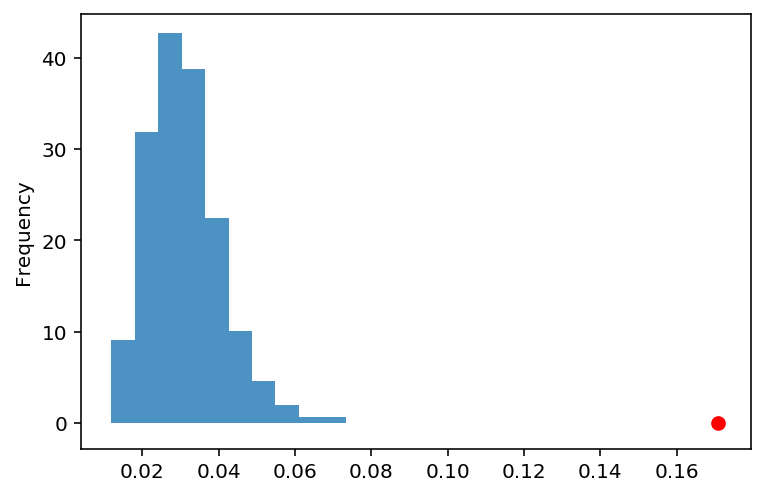

In [51]:
mdf = catted_df.assign(**{"SegMissing": catted_df["Segments"].isnull()})[["Impressions", "SegMissing"]]
#mdf.groupby("SegMissing").Spend.plot(kind = "kde", title = "Distribution of Spend by missingness of segs");
#Calculate the observed ks
obsks, _ = ks_2samp(
    mdf.loc[mdf['SegMissing'], 'Impressions'],
    mdf.loc[~mdf['SegMissing'], 'Impressions']
)
n_repetitions = 500
kslist = []
for _ in range(n_repetitions):
    
    # shuffle the Spend
    shuffled_spend = (
        mdf['Impressions']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # Throw it into a df
    shuffled = (
        mdf
        .assign(**{'ShuffledSpend': shuffled_spend})
    )
    #compute test stat
    ks, _ = ks_2samp(
        shuffled.loc[shuffled['SegMissing'], 'ShuffledSpend'],
        shuffled.loc[~shuffled['SegMissing'], 'ShuffledSpend']
    )
    # add it to the list of results
    kslist.append(ks)
#Visualize the results
pd.Series(kslist).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(obsks, 0, color='red', s=40);

This tells us that segments are MAR dependent on Impressions

Is the Segments MAR dependent on Country?


In [59]:
df = catted_df.assign(**{"SegMissing": catted_df["Segments"].isnull()})[["SegMissing", "CountryCode"]]

In [56]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the CountryCode column
    shuffled_col = (
        df['CountryCode']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        df
        .assign(**{
            'CountryCode': shuffled_col
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='SegMissing', columns='CountryCode', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

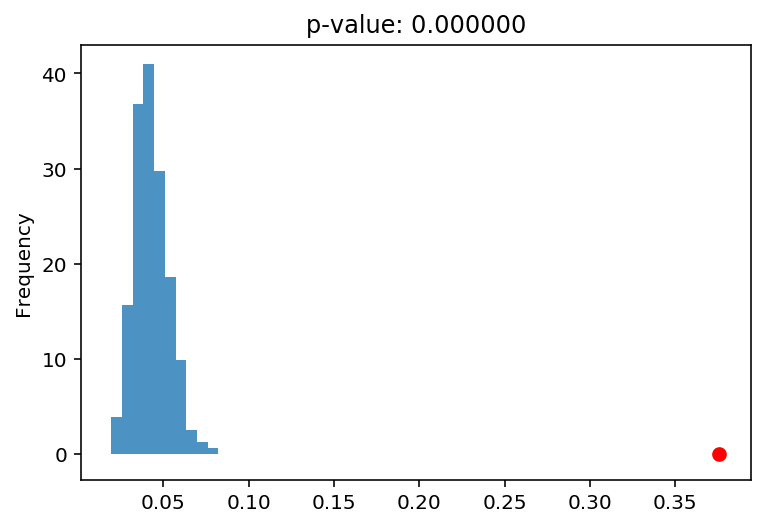

In [58]:
distr = (
    df
    .pivot_table(index='SegMissing', columns='CountryCode', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
obs = distr.diff().iloc[-1].abs().sum() / 2
#Calculate the observed test stat
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

### Hypothesis Test

For our hypothesis test, we are looking within the US across years to determine whether or not the cost of spending per view varies between midterm election years versus nonelection years. In this case, the null hypothesis is that these observations (ad spends) are drawn from the same distribution. The alternative, that they are not.

In [48]:
us_df = catted_df.query("Country == 'US'")
us_df = us_df.assign(**{"ElectionYear":us_df["Year"].apply(lambda x: True if x == 18 else False)})

In [49]:
catted_df['EndDate_Null'] = catted_df['EndDate'].isnull()
catted_df.query("EndDate_Null == True")
df_19['EndDate']

0       2019/05/11 20:28:39Z
1       2019/10/16 20:00:11Z
2                        NaN
3       2019/10/23 21:59:26Z
4       2019/04/15 17:42:26Z
                ...         
2639    2019/06/14 19:59:59Z
2640                     NaN
2641                     NaN
2642                     NaN
2643    2019/09/30 19:39:45Z
Name: EndDate, Length: 2644, dtype: object

In [ ]:
us_df = catted_df.query("Country == 'US'")
tot = us_df['LatLongRad'].shape[0]
us_df['LatLongRad'].unique()
from datetime import datetime
today = datetime.now()
today.strftime("%Y-%m-%d %H:%M:%S")
#today.strftime("%Y-%m-%d")
#datetime.today().date()

In [46]:
trials = 1000
#Permutation test using absolute difference of means
outliers = 0
#limit the numbers to ones within the US
obs = us_df.groupby("Year")["DollarPerView"].mean().diff().abs()[19]
# Calculate observed difference of means
us_df = us_df[["DollarPerView", "Year"]]
doms = []
for _ in range(trials):
    #shuffle relevant values
    shuffled = us_df.sample(frac=1,replace=False).reset_index(drop=True)["DollarPerView"]
    #assign the shuffleds to a df
    samp = us_df.assign(**{"DollarPerView":shuffled})
    test_stat = samp.groupby("Year")["DollarPerView"].mean().diff().abs()[19]
    #This calculates the abs diff of means of the sample
    doms.append(test_stat)
    #Making a list of mean diffs, for plotting
    if test_stat <= obs:
        #Count outliers to calc pval
        outliers += 1
outliers/trials
#So difference of means does not give me a statistically significant result, 
#let's see if this was because the test stat fails to pick up the difference, 
#or they really are drawn from the same distribution

0.776

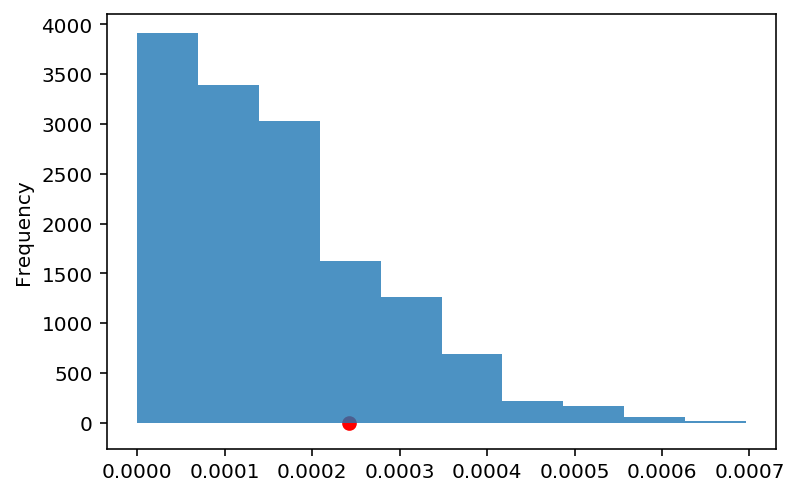

In [47]:
pd.Series(doms).plot(kind='hist', density=True, alpha=0.8)
#Visualizing the results of means permutation test
plt.scatter(obs, 0, color='red', s=40);

In [23]:
from scipy.stats import ks_2samp
ks = []
oks, _ = ks_2samp(us_df.loc[us_df["ElectionYear"], "DollarPerView"], us_df.loc[~us_df["ElectionYear"], "DollarPerView"])
# Permutation test using the ks_stat
for _ in range(trials):
    #shuffle relevant values
    shuffled = us_df.sample(frac=1,replace=False).reset_index(drop=True)["DollarPerView"]
    #put the shuffleds into a df
    samp = us_df.assign(**{"DollarPerView":shuffled})
    #compute the test statistic
    tks, _ = ks_2samp(samp.loc[samp["ElectionYear"], "DollarPerView"],samp.loc[~samp["ElectionYear"], "DollarPerView"])
    #add it to a list of test_stats for plotting
    ks.append(tks)
np.count_nonzero(np.array(ks) <= oks) / len(ks)

0.0

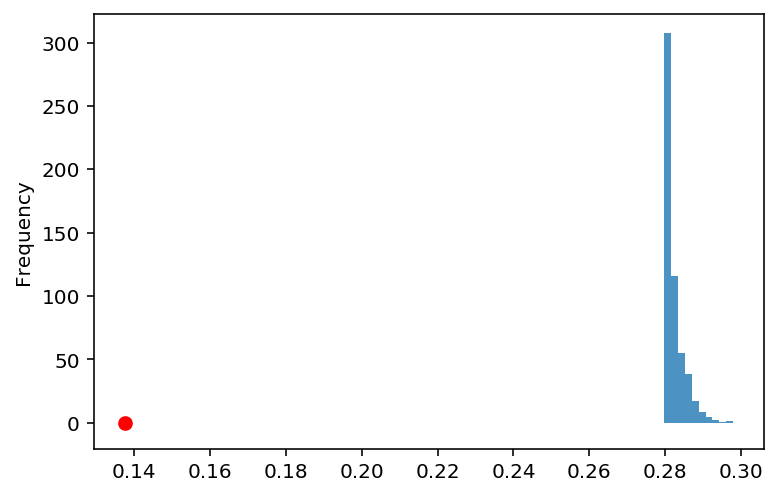

In [24]:
pd.Series(ks).plot(kind='hist', density=True, alpha=0.8)
# Visualize the result of ks permutation test
plt.scatter(oks, 0, color='red', s=40);

In [7]:
#assessing gender missingness
catted_df.groupby('Gender')['Gender'].count()
catted_df['Gender'].isna().sum()
#assessing age missingness
catted_df['AgeBracket'].isna().sum()
catted_df[['OrganizationName','CandidateBallotInformation', 'PayingAdvertiserName']].head()

,OrganizationName,CandidateBallotInformation,PayingAdvertiserName
0,"GMMB, Inc",NaN,JB for Governor
1,Revolution Messaging,NaN,Paid for by ReBuild USA
2,Lockwood Strategy,NaN,Change Now
3,The Prosper Group,NaN,No On L
4,Amnesty International UK,NaN,Amnesty International UK


In [8]:
catted_df[['CreativeUrl', 'CreativeProperties']].head()

,CreativeUrl,CreativeProperties
0,https://www.snap.com/political-ads/asset/b2c47...,web_view_url:https://iwillvote.com/?state=il
1,https://www.snap.com/political-ads/asset/affc7...,web_view_url:https://rebuildusa.info/landing-3
2,https://www.snap.com/political-ads/asset/754f6...,web_view_url:https://action.socalhealthcarecoa...
3,https://www.snap.com/political-ads/asset/818ae...,web_view_url:https://www.stopmeasurel.com
4,https://www.snap.com/political-ads/asset/2c264...,web_view_url:https://www.amnesty.org.uk/write-...
